# Exploratory Data Analysis (EDA) & Visualization: Diamond Dataset

## This notebook applies the visualization techniques from the lecture to the Diamond.csv dataset.

In [12]:
# 1. Import Libraries and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("Diamond.csv")

# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (308, 5)


,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


## **2. Univariate Analysis**

### 2.1 Numerical Variable: `carat` and `price`
### **Visualization: Histogram & Density Plot**

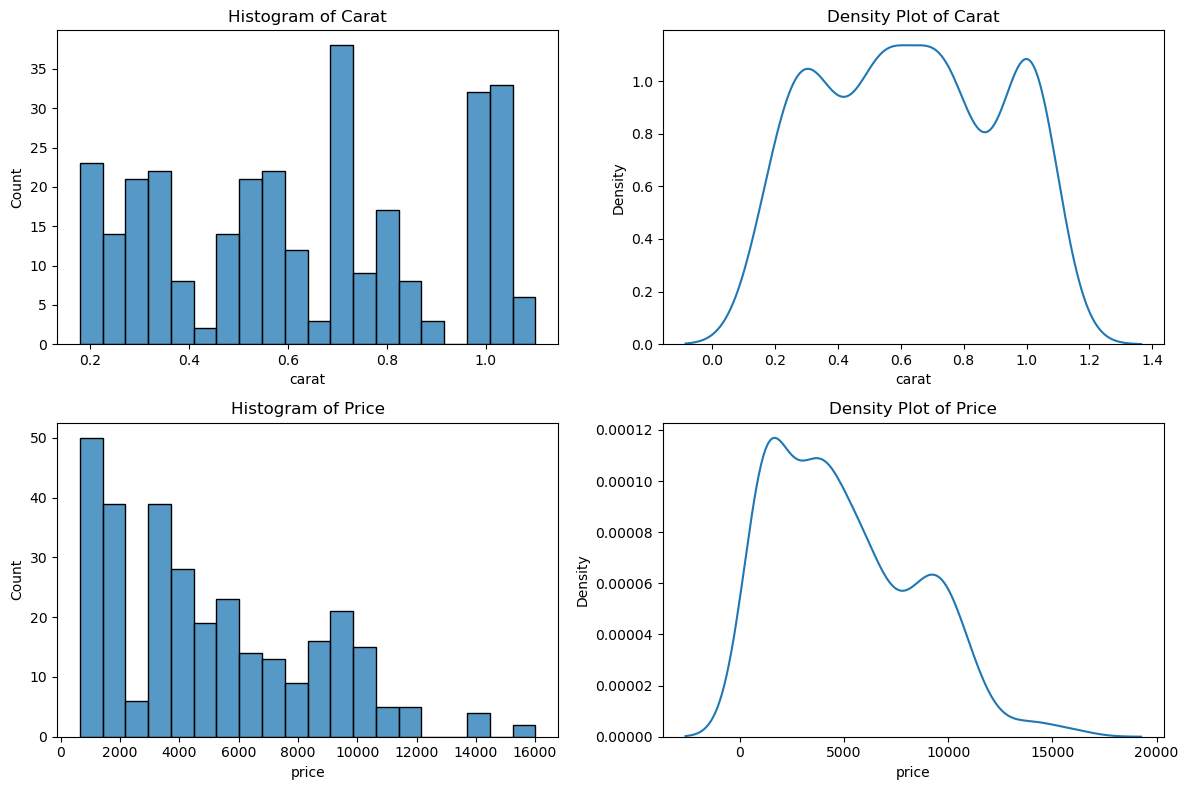

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for carat
sns.histplot(df['carat'], kde=False, ax=axes[0,0], bins=20)
axes[0,0].set_title('Histogram of Carat')

# Density plot for carat
sns.kdeplot(df['carat'], ax=axes[0,1])
axes[0,1].set_title('Density Plot of Carat')

# Histogram for price
sns.histplot(df['price'], kde=False, ax=axes[1,0], bins=20)
axes[1,0].set_title('Histogram of Price')

# Density plot for price
sns.kdeplot(df['price'], ax=axes[1,1])
axes[1,1].set_title('Density Plot of Price')

plt.tight_layout()
plt.show()

### **Visualization: Box/Whisker Plot**

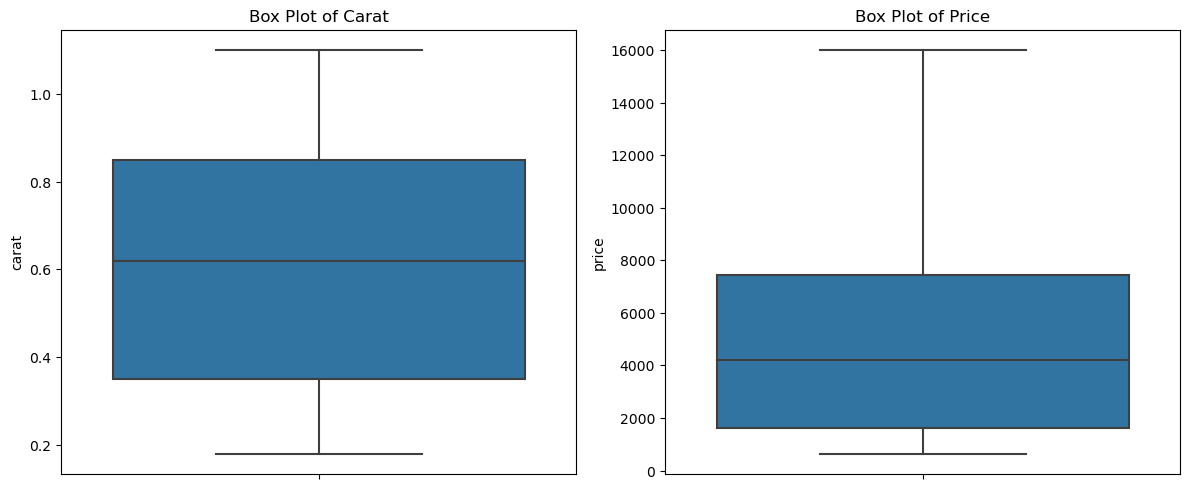

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['carat'], ax=axes[0])
axes[0].set_title('Box Plot of Carat')

sns.boxplot(y=df['price'], ax=axes[1])
axes[1].set_title('Box Plot of Price')

plt.tight_layout()
plt.show()

### 2.2 Categorical Variables: `colour`, `clarity`, `certification`
### **Visualization: Bar Chart**

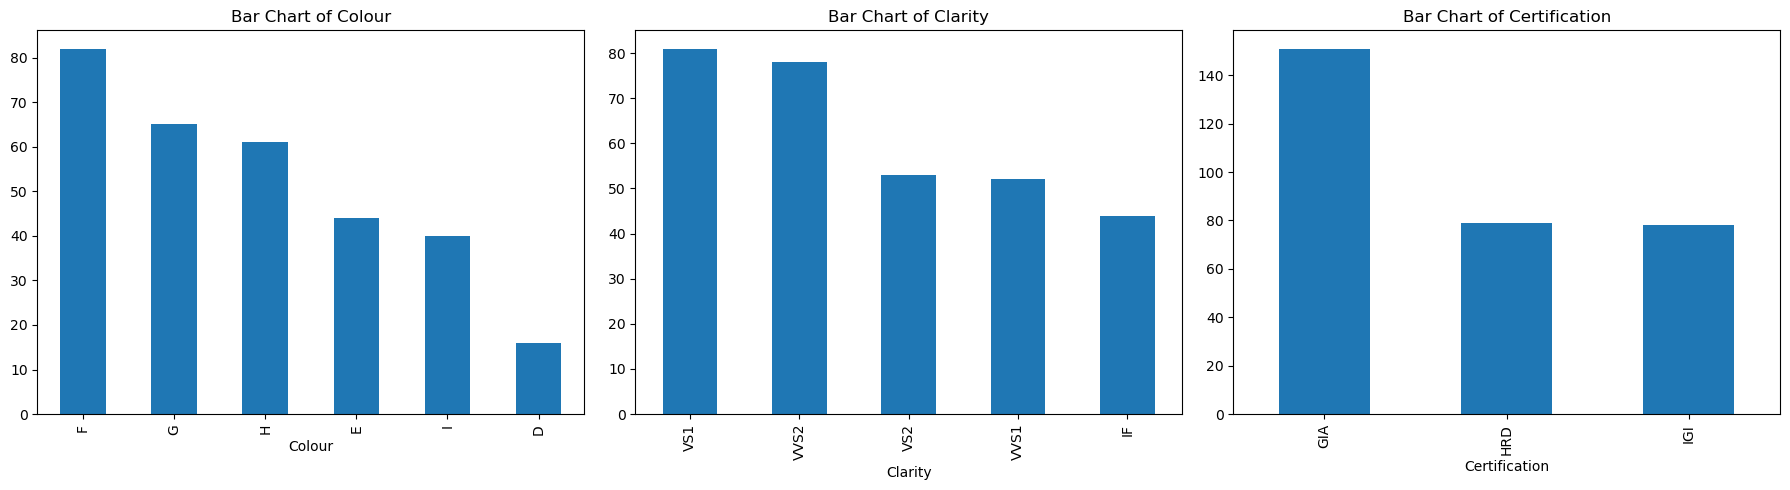

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Colour
df['colour'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Bar Chart of Colour')
axes[0].set_xlabel('Colour')

# Clarity
df['clarity'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Bar Chart of Clarity')
axes[1].set_xlabel('Clarity')

# Certification
df['certification'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Bar Chart of Certification')
axes[2].set_xlabel('Certification')

plt.tight_layout()
plt.show()


## **3. Bivariate Analysis**

### 3.1 Numeric vs. Numeric: `carat` vs `price`
### **Visualization: Scatter Plot**

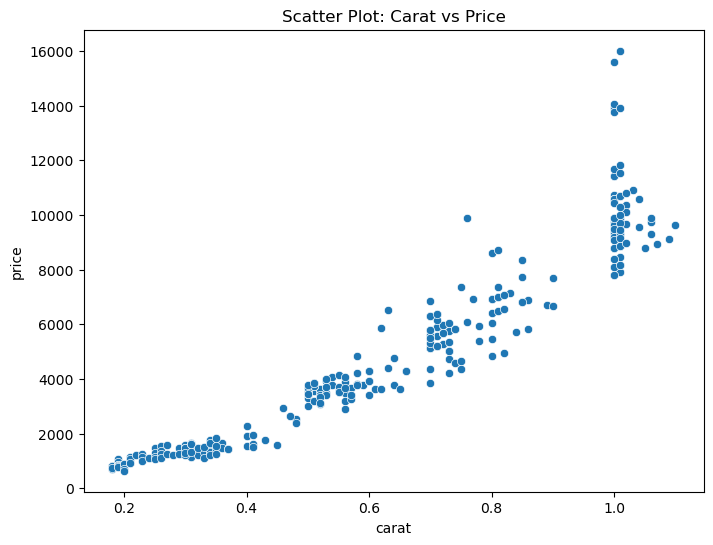

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Scatter Plot: Carat vs Price')
plt.show()

### 3.2 Categorical vs. Numeric: e.g., `colour` vs `price`
### **Visualization: Box Plots by Group**

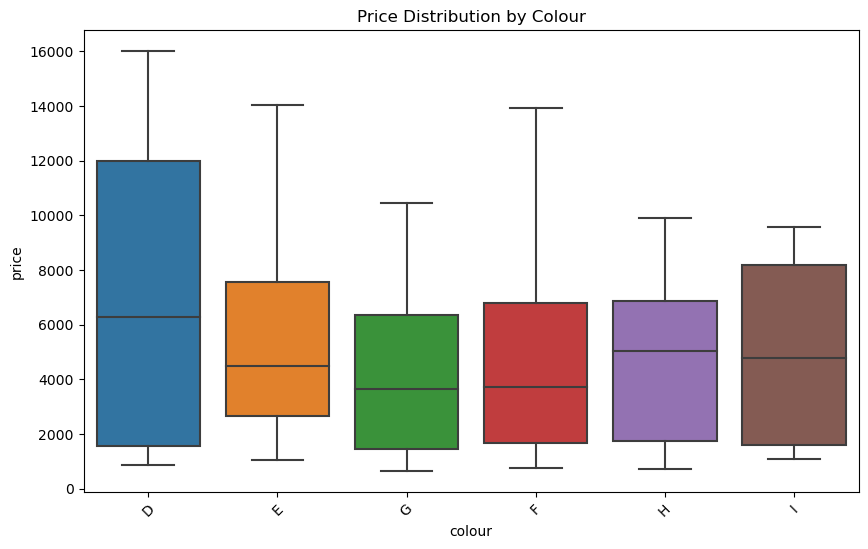

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='colour', y='price')
plt.title('Price Distribution by Colour')
plt.xticks(rotation=45)
plt.show()

### **Visualization: Violin Plots**

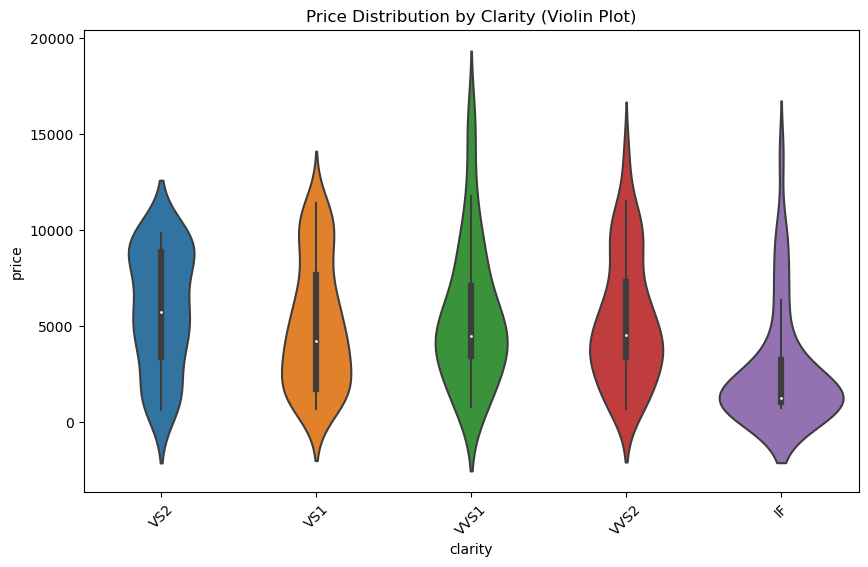

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='clarity', y='price')
plt.title('Price Distribution by Clarity (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

### 3.3 Categorical vs. Categorical: e.g., `certification` vs `clarity`
### **Visualization: Stacked Bar Chart**

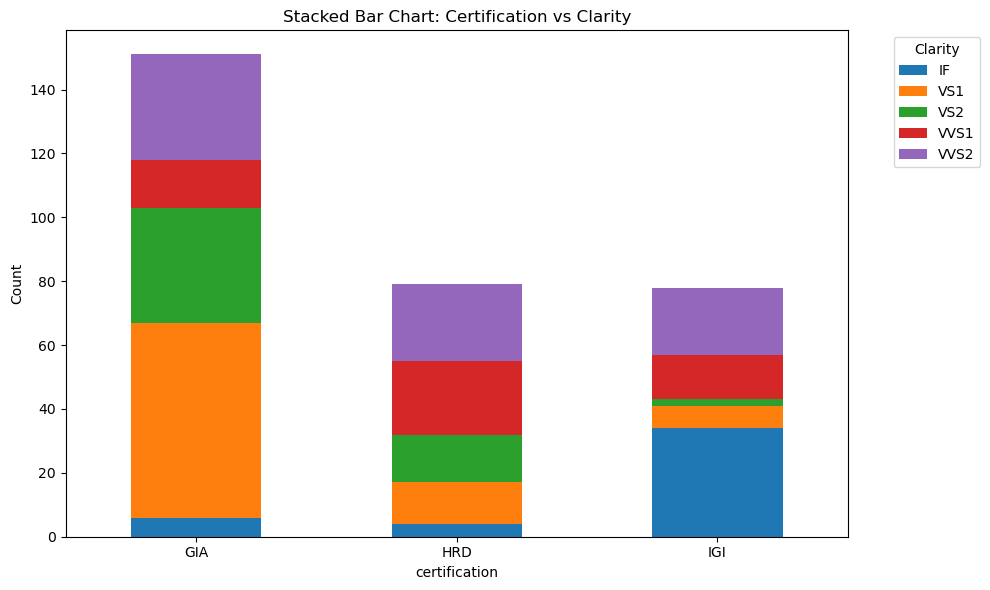

In [19]:
cert_clarity = pd.crosstab(df['certification'], df['clarity'])
cert_clarity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart: Certification vs Clarity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Visualization: Heatmap of Contingency Table**

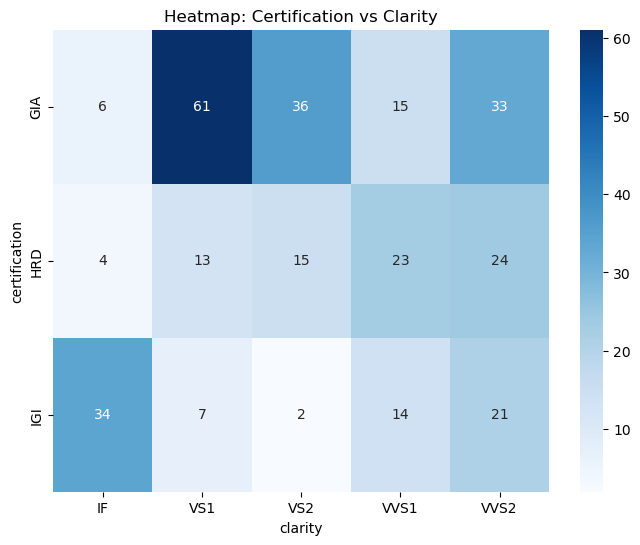

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cert_clarity, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Certification vs Clarity')
plt.show()

## **4. Multivariate Analysis**

### 4.1 Correlation Matrix for Numerical Variables
### **Visualization: Correlation Heatmap** (Lecture slide 26, 49-50)

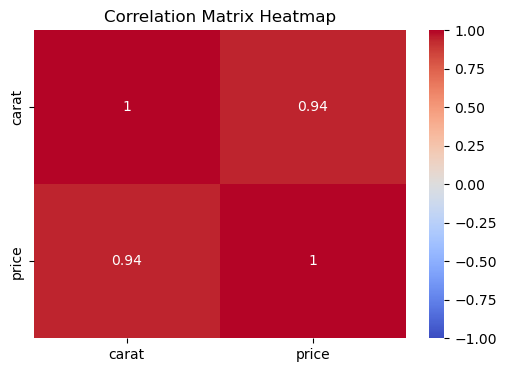

In [21]:
# The only numerical variables are 'carat' and 'price'
num_df = df[['carat', 'price']]
corr_matrix = num_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 4.2 Pair Plot (SPLOM)
### **Visualization: PairPlot**

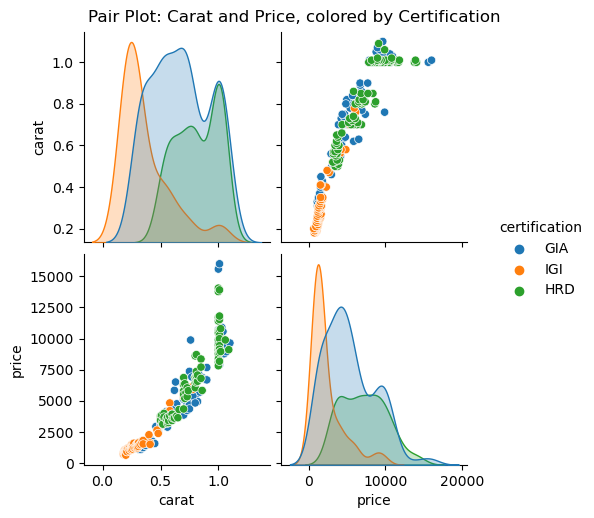

In [22]:
# Since we only have two numerical variables, the pairplot will be simple
sns.pairplot(df, hue='certification', vars=['carat', 'price'])
plt.suptitle('Pair Plot: Carat and Price, colored by Certification', y=1.02)
plt.show()

## **5. Summary**

 We have applied the core EDA visualization techniques from the lecture:<br>
**Univariate**: Histograms, density plots, box plots, bar charts.<br>
**Bivariate**: Scatter plots, grouped box/violin plots, stacked bars, heatmaps.<br>
**Multivariate**: Correlation heatmap, pairplot.